### Predictive statistics: class example 4, logistic regression


For our final topic of this session, we will implement logistic regression, again using scikit-learn. We will start by looking at some toy data as before. In a second example, we will use the "digits" data set that is often used as a standard machine learning example for handwriting recognition to see how logistic regression can also be used to treat this problem.

Let's set up the libraries again:

In [1]:
# import numpy to generate toy data, and matplotlib to plot it
import numpy as np
import matplotlib.pyplot as plt
# set up matplotlib to show the figures inline
plt.ion()
%matplotlib inline
# import the logistic regression method from scikit-learn
from sklearn.linear_model import LogisticRegression

#### Example 1: toy data

We will create some toy data for our first simple example. We will define our variable y to belong to class 0 for x < 6, and to class 1 for x >= 6:

Text(0, 0.5, 'y')

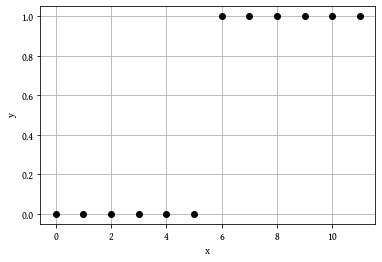

In [2]:
# define x
x = np.arange(0,12)
# define y, which can take values of 0 or 1 for the two "output" classes
y = np.zeros(np.shape(x))
y[x >= 6] = 1
# and let's plot our data:
plt.figure()
plt.plot(x,y,'ko')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')

There are no "noisy" points (where x < 6, but y = 1) in this toy data set. We will try changing this afterwards to make the problem more realistic.

Let's implement the logistic regression:

In [3]:
# create the logistic regression model using default options
model = LogisticRegression()
# and fit the model to our data
model.fit(x[:,None], y)

LogisticRegression()

Now we can get the outputs:

In [4]:
# the probability that each point belongs to each class:
p_pred = model.predict_proba(x[:,None])
# the predicted value of y (=> the predicted output class):
y_pred = model.predict(x[:,None])
# the accuracy of the model (a measure of how many points are 
# assigned to the wrong output class):
score_ = model.score(x[:,None], y)

Let's look at the values:

In [5]:
print(p_pred)

[[0.99857713 0.00142287]
 [0.99533076 0.00466924]
 [0.98479046 0.01520954]
 [0.95161326 0.04838674]
 [0.85660327 0.14339673]
 [0.64469175 0.35530825]
 [0.35530826 0.64469174]
 [0.14339674 0.85660326]
 [0.04838674 0.95161326]
 [0.01520954 0.98479046]
 [0.00466924 0.99533076]
 [0.00142287 0.99857713]]


Here we have a matrix with shape (2,12) -> we have 2 output classes, and 12 input data points. The matrix gives us the probability that each input data point is in each of the 2 output classes. You can see that the sum for each row = 1 : we have 2 class options, so the total probability must be distributed over these 2 options.

```y_pred``` tells us which class was assigned by the model for each of our input data points. The matrix will have the same shape as ```y```:

In [6]:
print(y_pred)

[0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]


And finally the score tells us how accurate the model is. The metric used here is: number of correct predictions / number of input data points:

In [7]:
print(score_)

1.0


Our example was very simple, with no anomalous points, and the model has correctly assigned all of the classes, so the score is 1. 

Let's plot the original data and the predictions to finish:

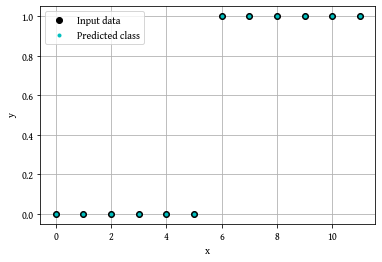

In [9]:
plt.figure()
plt.plot(x,y,'ko',label='Input data')
plt.plot(x,y_pred,'c.',label='Predicted class')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

Now let's try repeating the example but with some noisy points:

We will change the class of points: [1, 8, 5]


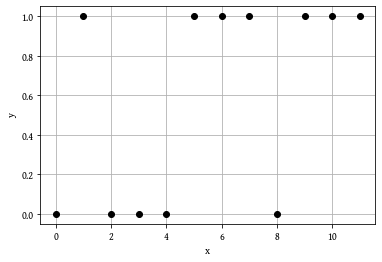

In [10]:
# define x
x = np.arange(0,12)
# define y, which can take values of 0 or 1 for the two "output" classes
y = np.zeros(np.shape(x))
y[x >= 6] = 1
# add some noise: we'll choose 3 points at random and change their sign
import random
i = random.sample(range(0,12),3)
print('We will change the class of points: {}'.format(i))
for ii in i:
    if y[ii] == 0:
        y[ii]=1
    else:
        y[ii]=0

# and let's plot our data:
plt.figure()
plt.plot(x,y,'ko')
plt.grid()
plt.xlabel('x')
plt.ylabel('y');

Below, you can reimplement the logistic regression following the example above. Does the regression still find the right cutoff value of x for class 0 / class 1? How does the score change?

In [ ]:
# enter your code here

Finally, we can easily adapt our example to use multiple predictors. Let's use an example where ```y = 1``` if ```x1 - x2 < 12```. We'll add some noise as well.

We will change the class of points: [(1, -5), (4, -9), (2, -4), (5, -8), (9, -6), (7, -1), (0, -2), (8, -10)]


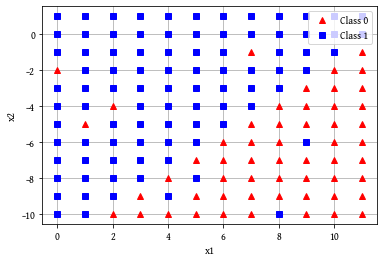

In [15]:
# define x1 (predictor 1)
x1_1D = np.arange(0,12)
# define x2
x2_1D = np.arange(-10,2)
# make a 2D array:
(x1,x2)=np.meshgrid(x1_1D,x2_1D)

# define y, which can take values of 0 or 1 for the two "output" classes
y = np.zeros_like(x1)
y[(x1 - x2 < 12)] = 1
# add some noise: we'll choose 8 points at random and change their sign
import random
ix = random.sample(range(0,12),8)
iy = random.sample(range(0,12),8)
print('We will change the class of points: {}'.format(list(zip(x1_1D[iy],x2_1D[ix]))))
for ii in zip(ix,iy):
    if y[ii] == 0:
        y[ii]=1
    else:
        y[ii]=0
        
# and plot the data:
plt.figure()
plt.plot(x1[y==0],x2[y==0],'r^',label='Class 0')
plt.plot(x1[y==1],x2[y==1],'bs',label='Class 1')
plt.grid()
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend();

To perform the logistic regression with multiple inputs, we just need to create an input matrix that contains all of our predictors, as for the linear regression:

In [16]:
# x1, x2 and y are 2D vectors at the moment, so we will reshape them into 1D arrays,
# and then combine x1 and x2 into a single input vector:
x1r = np.ravel(x1) #1D vector for x1
x2r = np.ravel(x2) #1D vector for x2
yr = np.ravel(y) #1D vector for y
X = np.vstack((x1r,x2r)).T # X contains x1 and x2

# set up the model:
model = LogisticRegression()
# and fit the model to our data
model.fit(X, yr)

LogisticRegression()

We can make predictions the same way as before. You can try below:

In [ ]:
# enter your code here

#### Example 2: the digits data set

To look at a more complicated example, we can apply this method to the digits data set. This is a set of images of handwritten numbers that have been labelled already. A "classic" machine learning test is to try to correctly identify these numbers. We will do this here using logistic regression. The data set can be loaded directly using scikit-learn:

In [17]:
from sklearn.datasets import load_digits
digits = load_digits()

The data set comprises a series of 8 pixel x 8 pixel images (each represented by a matrix of size (8,8)), and a corresponding label for each image:

In [18]:
# print the data set sizes:
print('Image data array size: {}'.format(digits.data.shape))
print('Class information array size: {}'.format(digits.target.shape))
print('Possible class values: {}'.format(np.unique(digits.target)))

Image data array size: (1797, 64)
Class information array size: (1797,)
Possible class values: [0 1 2 3 4 5 6 7 8 9]


In the examples with the toy data, we had 2 output classes. Here, we can see that we will need 9. Let's look at an example of the image data that will form our X array:

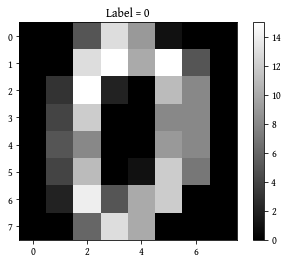

In [19]:
# select the first image and reshape it:
x0 = np.reshape(digits.data[0,:],(8,8))
# select the corresponding class label
y0 = digits.target[0]

# plot the data
plt.figure()
plt.imshow(x0,cmap='gray')
plt.title('Label = {}'.format(y0))
plt.colorbar()

You can see that the input data comprises arrays of (8,8) -> 64 elements, containing integer values between 0 and 16, which represent the shades of grey shown in the image. Our X array thus contains 64 predictor values, compared to the 2 predictors that we looked at in the toy example.

In a real-world application, to correctly evaluate the performance of our model, we would want to split our data into a training and test set. Here, we will just fit the model to all of our data to see how the method works, but keep in mind that if we wanted to evaluate the performance of our model, we should keep part of the data separate for this purpose.

We'll apply the model as before:

In [20]:
# set up the model:
model = LogisticRegression()
# and fit the model to our data
model.fit(digits.data,digits.target)

/Users/closes/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

And we can get the expected classes the same way as before:

In [21]:
# the probability that each point belongs to each class:
p_pred = model.predict_proba(digits.data)
# the predicted value of y (=> the predicted output class):
y_pred = model.predict(digits.data)
# the accuracy of the model (a measure of how many points are 
# assigned to the wrong output class):
score_ = model.score(digits.data, digits.target)

If we look at the predicted probability array, we will see that we have one value for each class, so 10 values for each input data array:

In [26]:
print('The shape of the probability array is: {}'.format(p_pred.shape))
print('Probability of the first image being in each of the 10 classes:')
for i in range(10):
    print('Class {}, P({})={:6.4f}'.format(i,i,p_pred[0,i]))

The shape of the probability array is: (1797, 10)
Probability of the first image being in each of the 10 classes:
Class 0, P(0)=1.0000
Class 1, P(1)=0.0000
Class 2, P(2)=0.0000
Class 3, P(3)=0.0000
Class 4, P(4)=0.0000
Class 5, P(5)=0.0000
Class 6, P(6)=0.0000
Class 7, P(7)=0.0000
Class 8, P(8)=0.0000
Class 9, P(9)=0.0000


If we look at the accuracy of the model, we see that it makes no errors: all images used in fitting the model have been correctly classified:

In [28]:
print('Model accuracy: {}'.format(score_))

Model accuracy: 1.0


We will get a better idea of the model's ability to accurately classify new data if we split the data into a test and training set. Let's try this:

In [29]:
from sklearn.model_selection import train_test_split
# we will set aside 25% of the data to test the model,
# and will fit the model to 75% of the data.
# train_test_split will divide the data up for us:
x_train, x_test, y_train, y_test = train_test_split(digits.data, 
                                    digits.target, test_size=0.25)

Let's fit the model again, using the training data only:

In [30]:
# set up the model:
model = LogisticRegression()
# and fit the model to our data
model.fit(x_train,y_train)

/Users/closes/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

If we compare the model accuracy on the test vs the training data, we will see that the model makes some errors when presented with data that was not used for the fitting:

In [31]:
print('Accuracy evaluated using training data: {}'.format(model.score(x_train,y_train)))
print('Accuracy evaluated using training data: {}'.format(model.score(x_test,y_test)))

Accuracy evaluated using training data: 1.0
Accuracy evaluated using training data: 0.96


We can look at an example where the model mis-classifies the test data:

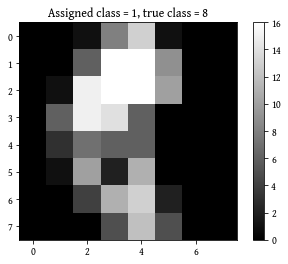

In [32]:
# get the model predictions for the test data
y_pred = model.predict(x_test)
# find points where the prediction is wrong
iwrong = np.where(y_pred != y_test)[0]
# display the image for the first point that is wrongly classified:
plt.figure()
idata = np.reshape(x_test[iwrong[0]],(8,8))
plt.imshow(idata,cmap='gray')
plt.title('Assigned class = {}, true class = {}'.format(y_pred[iwrong[0]],y_test[iwrong[0]]))
plt.colorbar();

Finally, we can see what the probability for each class was for this example:

In [33]:
# and print out the associated probabilities
proba = model.predict_proba(x_test[iwrong[0]][None,:])[0]
print('Probability for each class:')
for i,p in enumerate(proba):
    print('Class: {}, probability: {:5.3f}'.format(i,p))

Probability for each class:
Class: 0, probability: 0.000
Class: 1, probability: 0.998
Class: 2, probability: 0.000
Class: 3, probability: 0.000
Class: 4, probability: 0.000
Class: 5, probability: 0.000
Class: 6, probability: 0.000
Class: 7, probability: 0.000
Class: 8, probability: 0.000
Class: 9, probability: 0.002
